In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from bokeh.palettes import Category20
from bokeh.palettes import Category20b
from bokeh.palettes import magma
import bokeh
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("./runE/merged.bi.lmiss90.ed.allChrs.bgl.noAmericans.noPA.noIBD.allInds.RunE.PCAInput.txt", sep="\t") # testPCA.txt

In [6]:
#for state based plotting
states = df['pop'].unique()
n_states = len(states)
#from bokeh import diverging_palette
diverging_palette = bokeh.palettes.diverging_palette(Category20[20], Category20b[20],n_states, 0.5)

colors = list(diverging_palette)

In [8]:
features = df.columns[3:]
x = df.loc[:, features].values
y = df.loc[:,['pop']].values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
finalDf = pd.concat([principalDf, df[['pop','Recipient']]], axis = 1)

individuals = finalDf['Recipient']



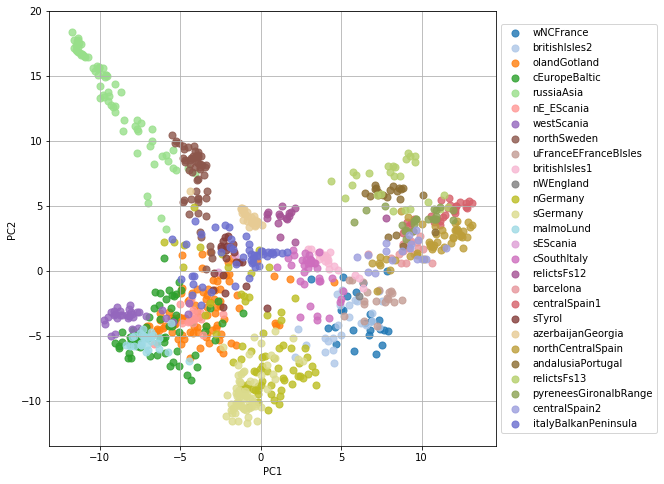

In [9]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1",)
ax.set_ylabel("PC2",)
pops = finalDf['pop'].unique()

#colors = ['r','g','b','k','tab:cyan','tab:orange','tab:green']
for pop , color in zip(pops, colors):
    indicesToKepp = finalDf['pop'] == pop
    ax.scatter(finalDf.loc[indicesToKepp, 'pc1'],
              finalDf.loc[indicesToKepp,'pc2'],
              c = color,
              s = 50,
              alpha=0.8)
#for i, txt in enumerate(individuals):
 #   ax.annotate(txt, (finalDf.pc1[i], finalDf.pc2[i]))
ax.legend(pops,loc='center left', bbox_to_anchor=(1, 0.5),
         )
ax.grid()

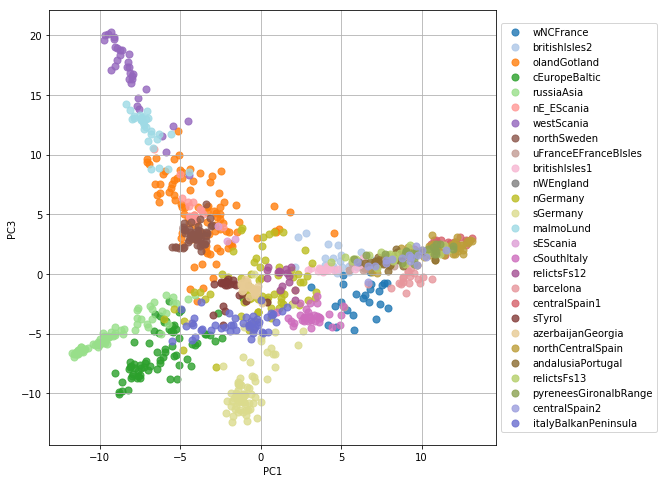

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1",)
ax.set_ylabel("PC3",)
pops = finalDf['pop'].unique()

#colors = ['r','g','b','k','tab:cyan','tab:orange','tab:green']
for pop , color in zip(pops, colors):
    indicesToKepp = finalDf['pop'] == pop
    ax.scatter(finalDf.loc[indicesToKepp, 'pc1'],
              finalDf.loc[indicesToKepp,'pc3'],
              c = color,
              s = 50,
              alpha=0.8)
#for i, txt in enumerate(individuals):
 #   ax.annotate(txt, (finalDf.pc1[i], finalDf.pc2[i]))
ax.legend(pops,loc='center left', bbox_to_anchor=(1, 0.5),
         )
ax.grid()

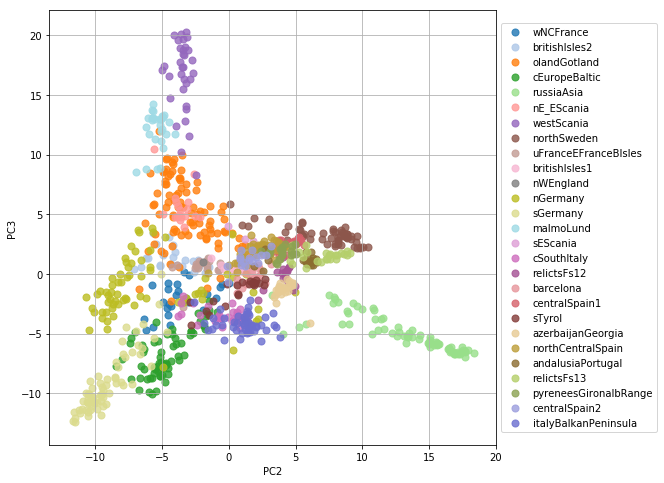

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC2",)
ax.set_ylabel("PC3",)
pops = finalDf['pop'].unique()

#colors = ['r','g','b','k','tab:cyan','tab:orange','tab:green']
for pop , color in zip(pops, colors):
    indicesToKepp = finalDf['pop'] == pop
    ax.scatter(finalDf.loc[indicesToKepp, 'pc2'],
              finalDf.loc[indicesToKepp,'pc3'],
              c = color,
              s = 50,
              alpha=0.8)
#for i, txt in enumerate(individuals):
 #   ax.annotate(txt, (finalDf.pc1[i], finalDf.pc2[i]))
ax.legend(pops,loc='center left', bbox_to_anchor=(1, 0.5),
         )
ax.grid()

In [65]:
finalDf_region = finalDf.rename(columns={'pop': 'region'})

In [68]:
finalDf_region.to_csv("PCA_results.txt", sep="\t", float_format="%.4f", index=False)

In [42]:
import umap
import umap.plot

In [57]:
mapper_gt_umap_lownn = umap.UMAP(n_neighbors=100, min_dist=0.8, random_state=7767, metric="euclidean").fit(x)

In [58]:
embeddingDf = pd.DataFrame(mapper_gt_umap_lownn.embedding_, )
#sns.scatterplot(embeddingDf[0], embeddingDf[1]);


#add ind/pop columns
embeddingDf["ind"]=df["Recipient"]
embeddingDf["subcluster"]=df["fsSub"]
embeddingDf['region']=df['pop']

#rename embeddings with emb1 and emb2
embeddingDf.rename(columns={0:"emb1", 1:"emb2"}, inplace=True)

In [59]:
#from bokeh import diverging_palette
import bokeh
diverging_palette = bokeh.palettes.diverging_palette(Category20[20], Category20b[20],n_states, 0.5)
#for state based plotting
states = embeddingDf['region'].unique()
n_states = len(states)

color_dict={}
#for colors over 20
for i, pop in enumerate(states):
    color_dict[pop] = diverging_palette[i]


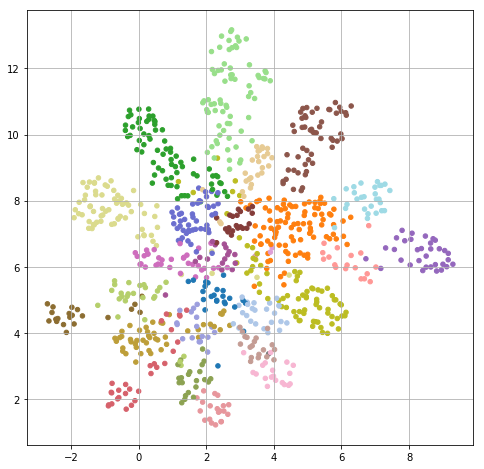

In [60]:
#plot scatter1
fig, ax=plt.subplots(figsize=(8,8))
plt.scatter(embeddingDf.emb1,embeddingDf.emb2,s=20, c=embeddingDf['region'].apply(lambda x: color_dict[x]) )
#ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,ncol=3,handleheight=2.4, labelspacing=0.05)
ax.grid()

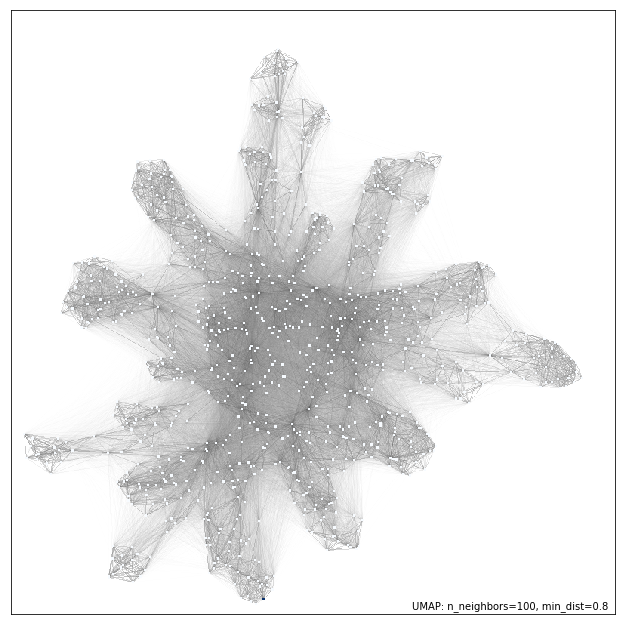

In [61]:
#plot connections
import warnings; warnings.simplefilter('ignore')
umap.plot.connectivity(mapper_gt_umap_lownn, show_points=True)

In [62]:
embeddingDf.to_csv("umapOut_nn100_minDist0_8_euclidean.txt", sep="\t", float_format="%.4f", index=False)

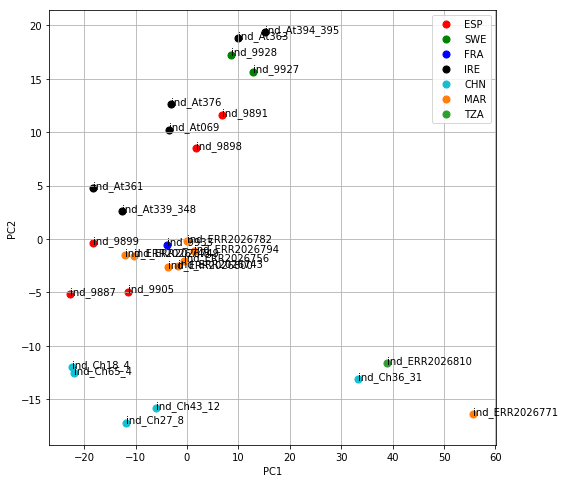

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1",)
ax.set_ylabel("PC2",)
pops = finalDf['pop'].unique()

colors = ['r','g','b','k','tab:cyan','tab:orange','tab:green']
for pop , color in zip(pops, colors):
    indicesToKepp = finalDf['pop'] == pop
    ax.scatter(finalDf.loc[indicesToKepp, 'pc1'],
              finalDf.loc[indicesToKepp,'pc2'],
              c = color,
              s = 50)
for i, txt in enumerate(individuals):
    ax.annotate(txt, (finalDf.pc1[i], finalDf.pc2[i]))
ax.legend(pops)
ax.grid()

In [40]:
finalDf.pc1[0]

-22.809705961320834

In [131]:
from bokeh.palettes import Category20
from bokeh.palettes import Category20b
from bokeh.palettes import magma
Category20b[20]

('#393b79',
 '#5254a3',
 '#6b6ecf',
 '#9c9ede',
 '#637939',
 '#8ca252',
 '#b5cf6b',
 '#cedb9c',
 '#8c6d31',
 '#bd9e39',
 '#e7ba52',
 '#e7cb94',
 '#843c39',
 '#ad494a',
 '#d6616b',
 '#e7969c',
 '#7b4173',
 '#a55194',
 '#ce6dbd',
 '#de9ed6')

In [132]:
df = pd.read_csv("test3.txt", sep="\t")

#for state based plotting
states = df['pop'].unique()
n_states = len(states)

n_states

39

In [136]:

#from bokeh import diverging_palette
import bokeh
diverging_palette = bokeh.palettes.diverging_palette(Category20[20], Category20b[20],n_states, 0.5)

diverging_palette

'''
color_dict={}
#for colors over 20
for i, pop in enumerate(states):
    color_dict[pop] = diverging_palette[i]

#for colors upto20
#for i, pop in enumerate(states):
#    color_dict[pop] = Category20[20][i]
'''
colors = list(diverging_palette)

In [137]:
features = df.columns[2:]
x = df.loc[:, features].values
y = df.loc[:,['pop']].values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [138]:
finalDf = pd.concat([principalDf, df[['pop','Recipient']]], axis = 1)

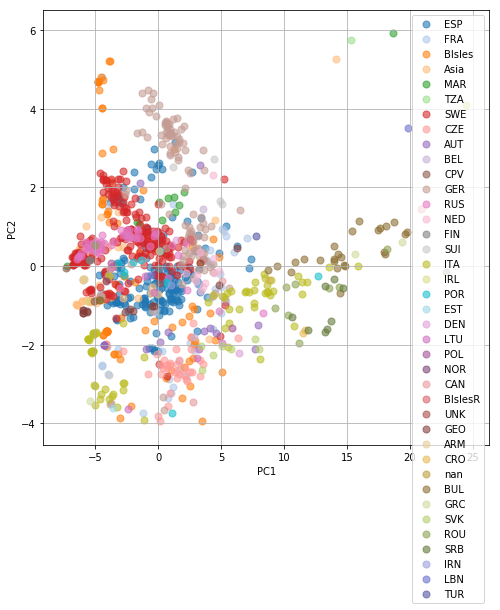

In [141]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1",)
ax.set_ylabel("PC2",)
pops = finalDf['pop'].unique()

#colors = ['r','g','b','k','tab:cyan','tab:orange','tab:green']

for pop , color in zip(pops, colors):
    indicesToKepp = finalDf['pop'] == pop
    ax.scatter(finalDf.loc[indicesToKepp, 'pc1'],
              finalDf.loc[indicesToKepp,'pc10'],
              c = color,
              s = 50,
              alpha=0.6)
#for i, txt in enumerate(individuals):
 #   ax.annotate(txt, (finalDf.pc1[i], finalDf.pc2[i]))
ax.legend(pops)
ax.grid()

In [68]:
individuals

39     ind_PA0021
40     ind_PA0156
41     ind_PA0157
42     ind_PA0163
43     ind_PA0167
          ...    
232    ind_PA0906
233    ind_PA0907
234    ind_PA0918
235    ind_PA0919
236    ind_PA0920
Name: Recipient, Length: 148, dtype: object